In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5220-A98C

 Directory of C:\Users\abc\OneDrive\Desktop\excelr\Assignments\multi_linear_regression

26/08/2022  06:40    <DIR>          .
26/08/2022  06:40    <DIR>          ..
26/08/2022  06:33    <DIR>          .ipynb_checkpoints
24/08/2022  08:16             2,436 50_Startups.csv
25/08/2022  23:54           521,140 Assignment_5_multiplelinearregression_nihalinamdar.ipynb
26/08/2022  06:40             1,174 Assignment_5_Q2_multiplelinearregression_nihalinamdar.ipynb
24/08/2022  08:16               468 proble_statement(50_startups).txt
24/08/2022  08:16             1,752 Toyota Corolla.txt
24/08/2022  08:16           224,041 ToyotaCorolla.csv
               6 File(s)        751,011 bytes
               3 Dir(s)  20,809,269,248 bytes free


In [7]:
# 'utf-8' codec error
car=pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
car

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [16]:
car2=pd.concat([car.iloc[:,2:4],car.iloc[:,6:7],car.iloc[:,8:9],car.iloc[:,12:14],car.iloc[:,15:18]],axis=1)
car2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [23]:
car3=car2.rename({'Age_08_04':'age','KM':'km','HP':'hp','Quarterly_Tax':'qt','Doors':'doors','Gears':'gears','Weight':'weight'},axis=1)
car3

,Price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [24]:
car3[car3.duplicated()]

,Price,age,km,hp,cc,doors,gears,qt,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [25]:
car4=car3.drop_duplicates().reset_index(drop=True)
car4

,Price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [27]:
car4[car4.duplicated()]

,Price,age,km,hp,cc,doors,gears,qt,weight


In [28]:
car4.describe()

,Price,age,km,hp,cc,doors,gears,qt,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [29]:
car4.corr()

,Price,age,km,hp,cc,doors,gears,qt,weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
qt,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


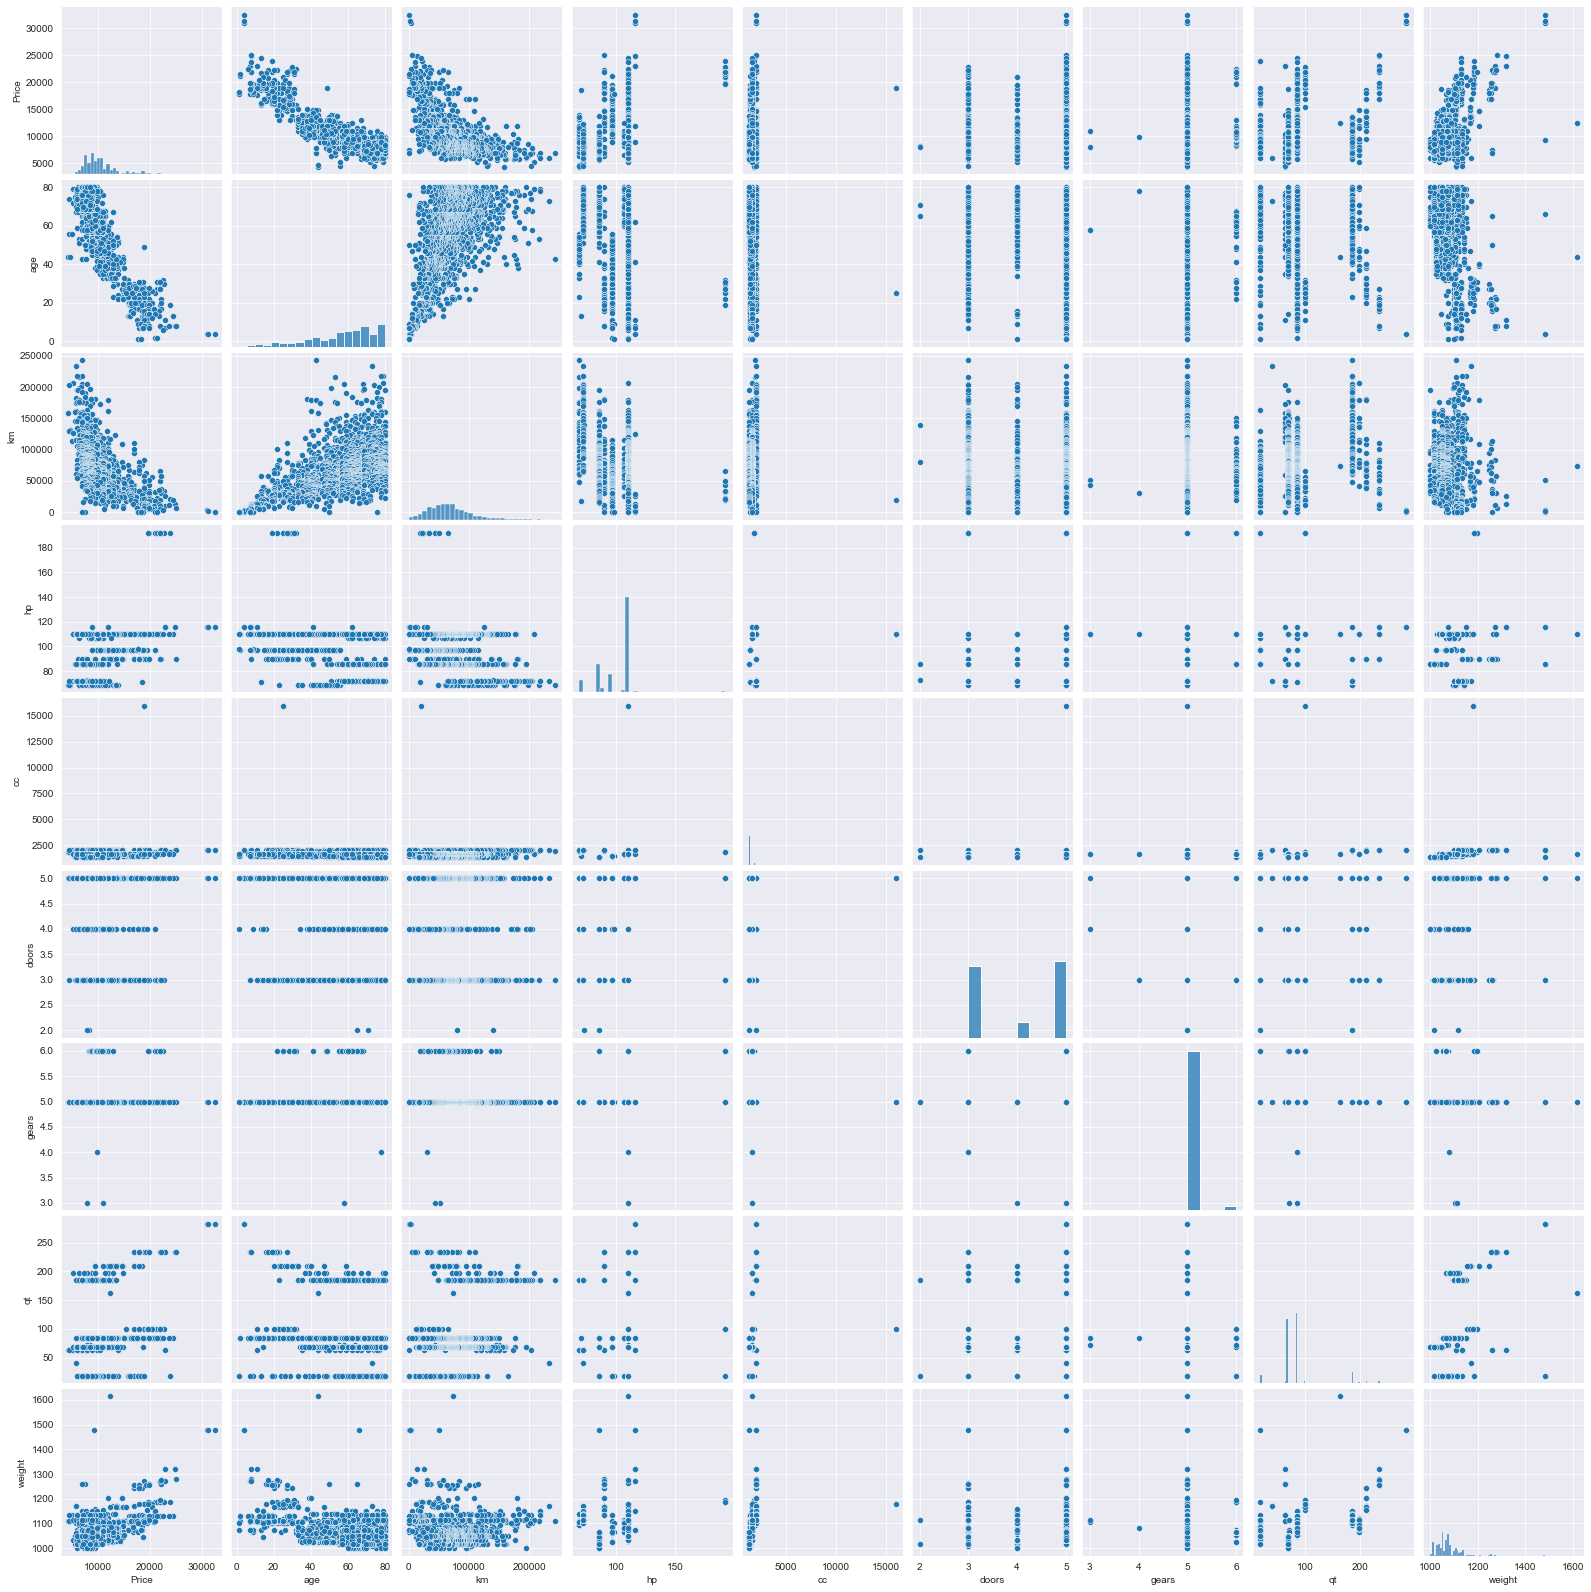

In [32]:
sns.set_style(style='darkgrid')
sns.pairplot(car4)

In [34]:
model=smf.ols('Price~age+km+hp+cc+doors+gears+qt+weight',data=car4).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:24:25   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# cc and doors have a higher pvalue which will tend to reduce accuracy and predictions due to inter dependency of features

In [38]:
slr_cc=smf.ols('Price~cc',data=car4).fit()
slr_cc.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [43]:
slr_d=smf.ols('Price~doors',data=car4).fit()
slr_d.pvalues

Intercept    8.976407e-75
doors        2.404166e-12
dtype: float64

In [46]:
slr_cd=smf.ols('Price~cc+doors',data=car4).fit()
slr_cd.pvalues

Intercept    1.580945e-35
cc           2.101878e-05
doors        2.109558e-11
dtype: float64

# Collinearity Check

In [48]:
#dep features --> cc,door
#ind features --> age,km,hp,,gears,qt,weight

rsq_age=smf.ols('age~km+hp+cc+doors+gears+qt+weight',data=car4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('km~age+hp+cc+doors+gears+qt+weight',data=car4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('hp~age+km+cc+doors+gears+qt+weight',data=car4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~age+km+hp+doors+gears+qt+weight',data=car4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('doors~age+km+cc+hp+gears+qt+weight',data=car4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('gears~age+km+cc+doors+hp+qt+weight',data=car4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('qt~age+km+cc+doors+gears+hp+weight',data=car4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('weight~age+km+cc+doors+gears+qt+hp',data=car4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['age','km','hp','cc','doors','gears','qt','weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,qt,2.295375
7,weight,2.487180


In [49]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual analysis

<function matplotlib.pyplot.show(close=None, block=None)>

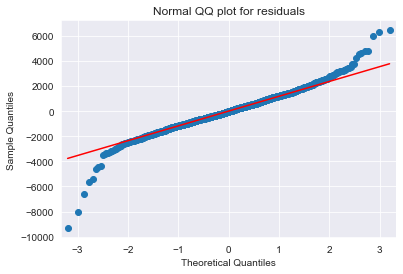

In [52]:
sm.qqplot(model.resid,line='q')
plt.title("Normal QQ plot for residuals")
plt.show

In [54]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [56]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# Homoscedasticity test

In [57]:
def standardised_values(vals) : return (vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

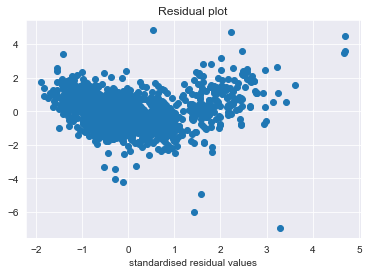

In [60]:
plt.scatter(standardised_values(model.fittedvalues),standardised_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardised fitted values')
plt.xlabel('standardised residual values')
plt.show

# Test for errors and features dependency

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

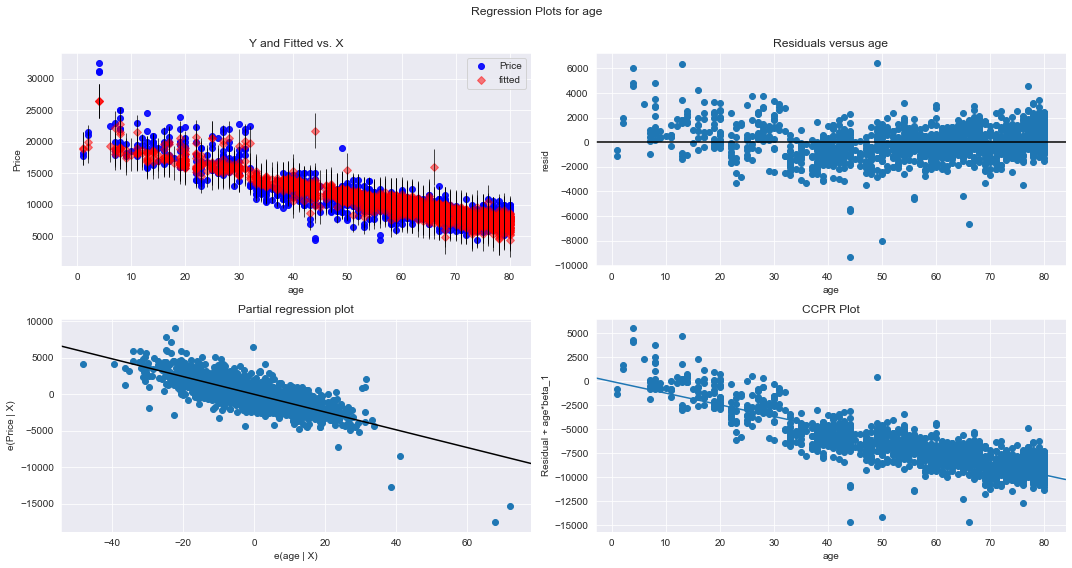

In [64]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

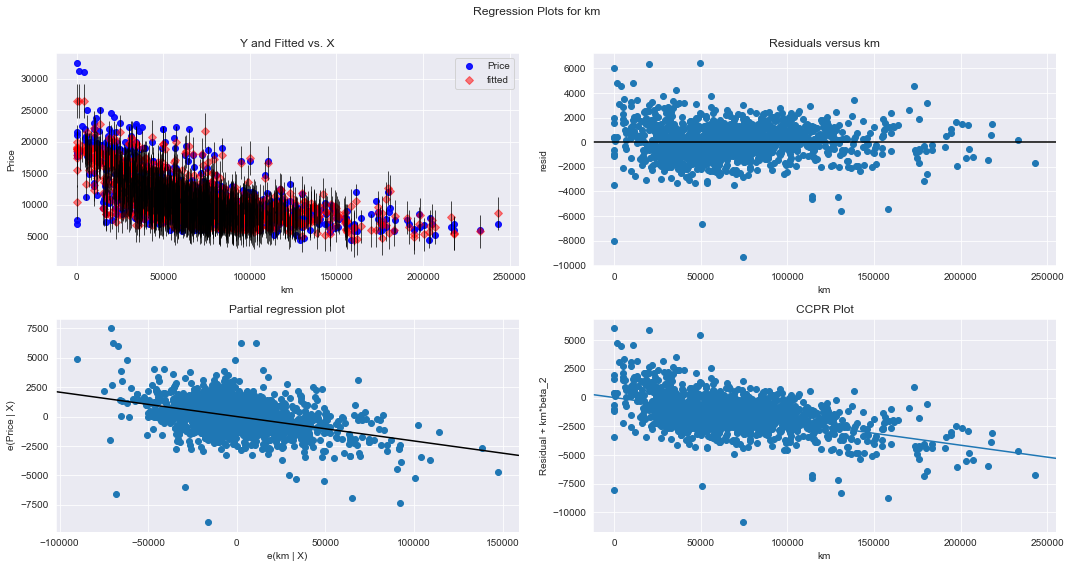

In [65]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'km',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

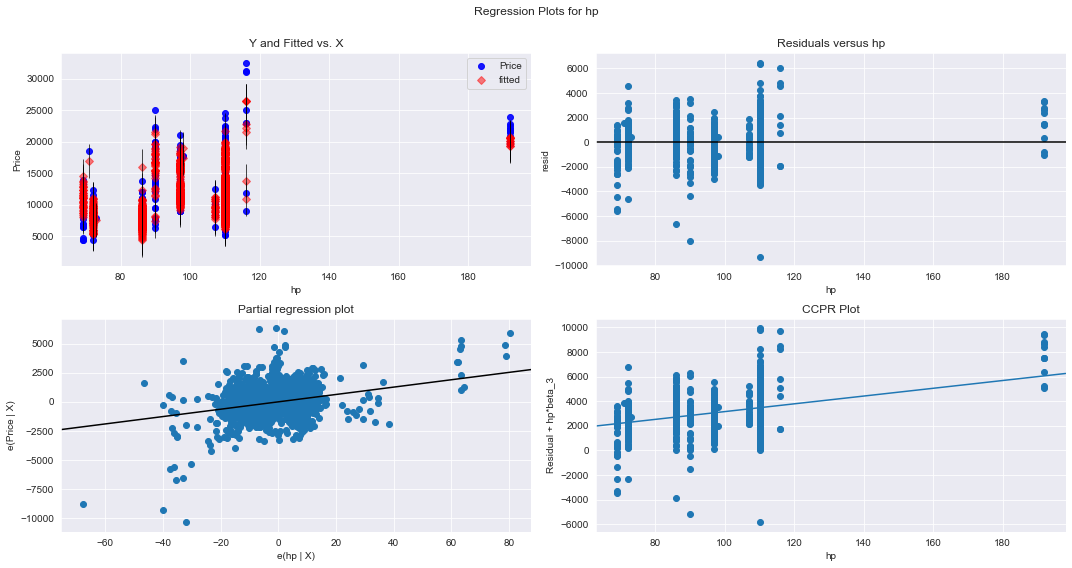

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'hp',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

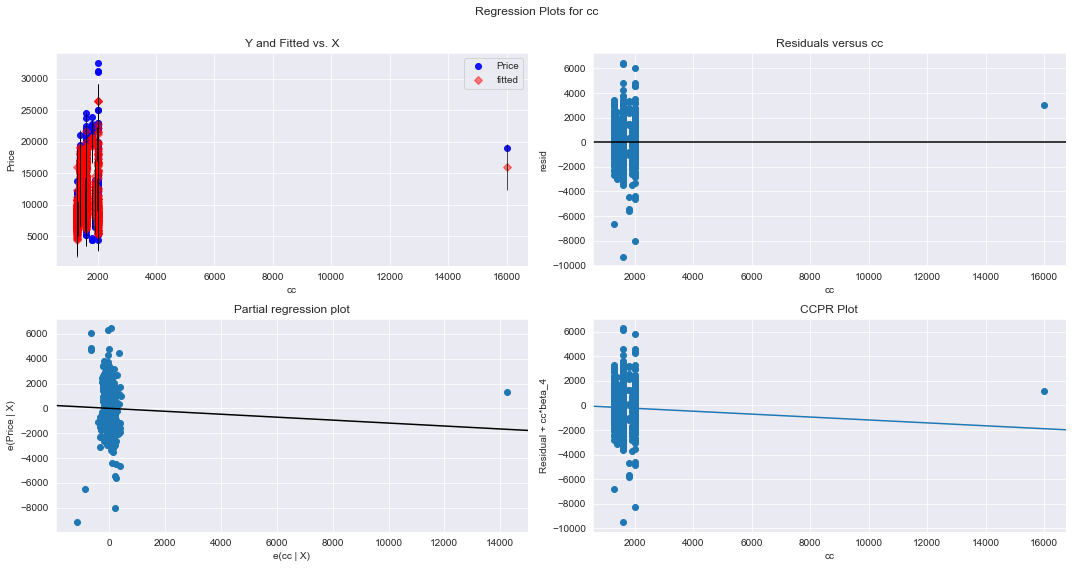

In [67]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

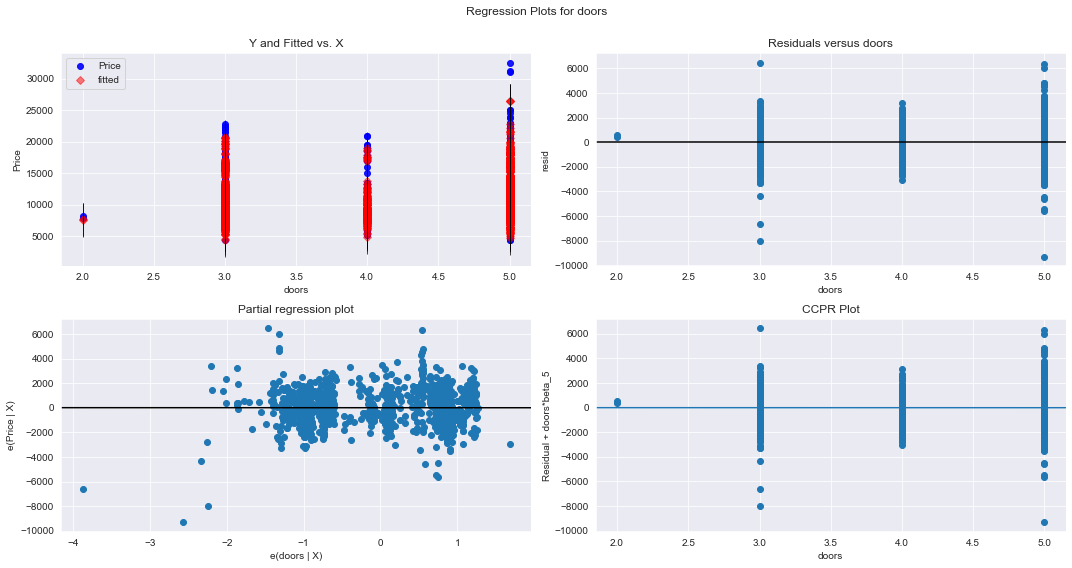

In [68]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

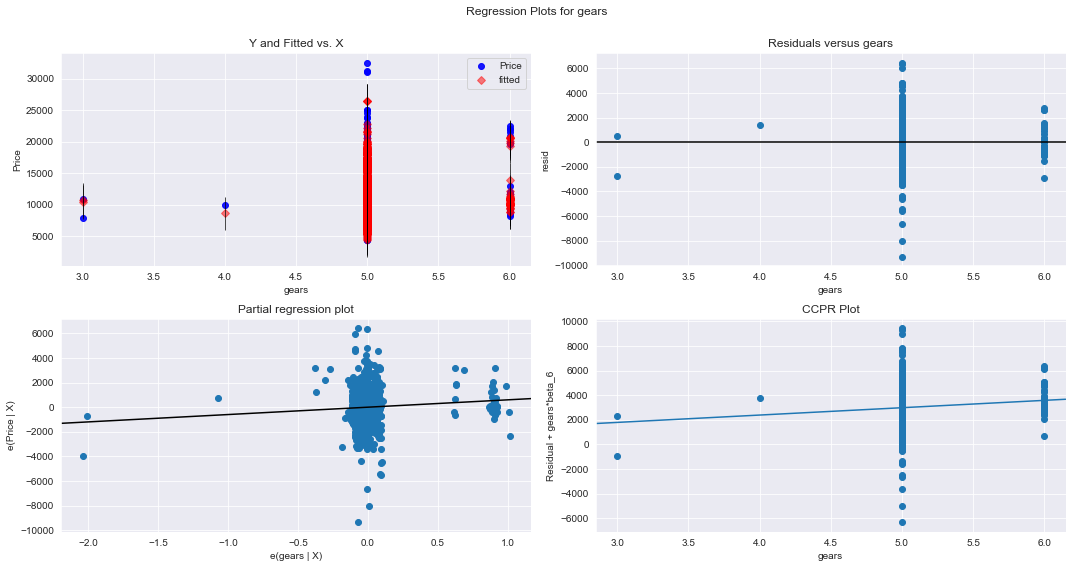

In [69]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'gears',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

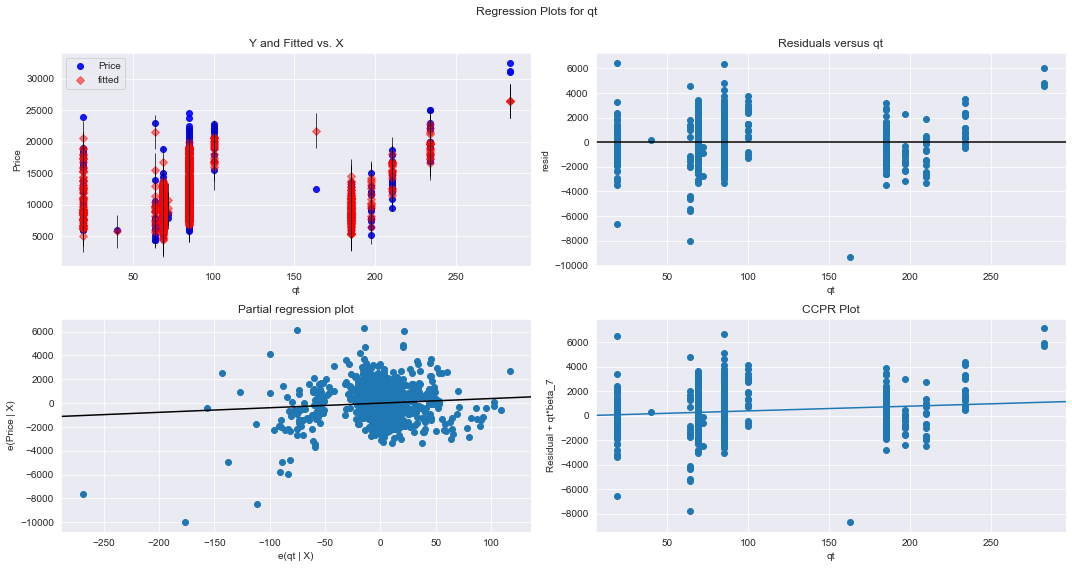

In [70]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'qt',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

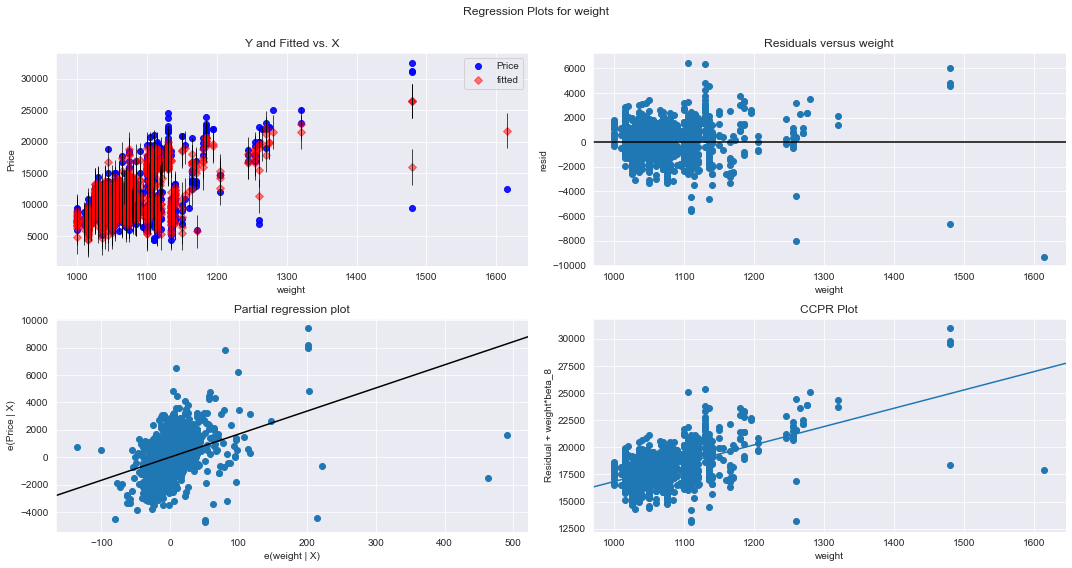

In [71]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'weight',fig=fig)
plt.show

# Outlier detection and removal

In [72]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

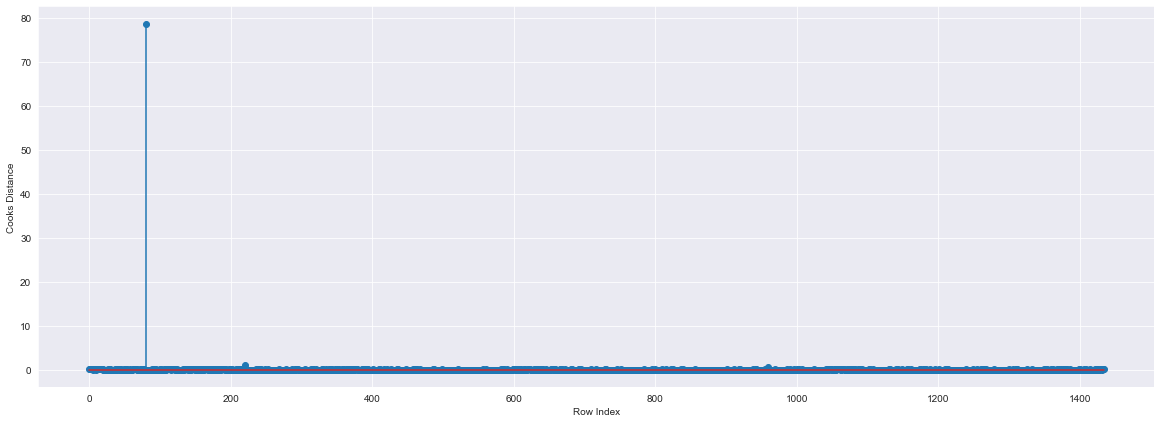

In [74]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
np.argmax(c) , np.max(c)

(80, 78.7295058224851)

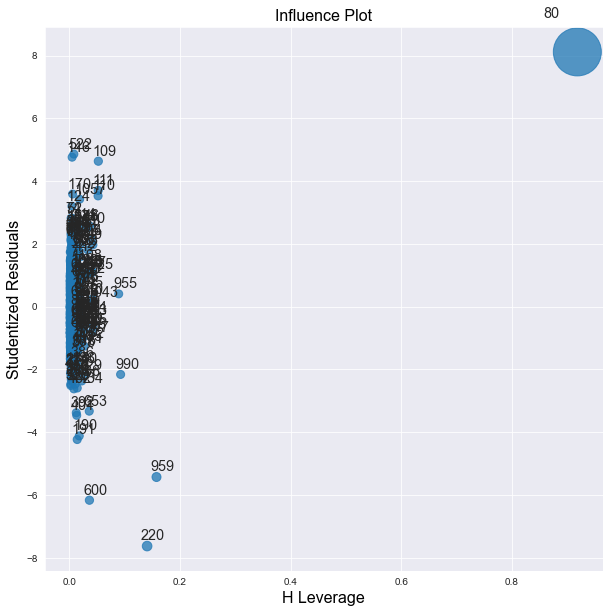

In [79]:
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax = ax)

In [80]:
k=car4.shape[1]
n=car4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [83]:
car4[car4.index.isin([80])] 

,Price,age,km,hp,cc,doors,gears,qt,weight
80,18950,25,20019,110,16000,5,5,100,1180


# Model Improvement

In [85]:
car5=car4.copy()
car5

,Price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [87]:
car6=car5.drop(car5.index[[80]],axis=0).reset_index(drop=True)
car6

,Price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Final Model - car6

In [99]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~age+km+hp+cc+doors+gears+qt+weight',data=car6).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    car6=car6.drop(car6.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    car6
else:
    final_model=smf.ols('Price~age+km+hp+cc+doors+gears+qt+weight',data=car6).fit()
    final_model.rsquared 
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:10:12   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
age         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
km            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
hp            36.5587      2.747     13.308      0.000      31.170      41.947
cc            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
doors       -121.9808     37.498     -3.253      0.001    -195.539     -48.423
gears        466.6014    181.031      2.577      0.010     111.485     821.718
qt             5.1754      1.373      3.770      0.000       2.482       7.869
weight        30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model prediction

In [103]:
new_data=pd.DataFrame({'age':10,"km":50000,"hp":100,"cc":1600,"doors":4,"gears":5,"qt":70,"weight":1200},index=[0])
new_data

,age,km,hp,cc,doors,gears,qt,weight
0,10,50000,100,1600,4,5,70,1200


In [104]:
final_model.predict(new_data)

0    20011.600221
dtype: float64

In [106]:
pred_y=final_model.predict(car6)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64